## Importing Necessary Libraries

In [1]:
import numpy  as np
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk.corpus
import re
from nltk import SnowballStemmer
from unidecode  import unidecode
from sklearn.feature_extraction.text  import TfidfVectorizer
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.model_selection import train_test_split

## Importing the dataset

In [2]:
data=pd.read_csv("text data.csv",index_col=0)
data.head()

,col
0.0,CHINA SWITCHES U . S . WHEAT TO 1987 / 88 FROM...
1.0,FRANCE WILL FIGHT EC FARM PROPOSALS - MINISTER...
2.0,FERRUZZI PARIS UNIT SEEN ABSORBING CPC PURCHAS...
3.0,NO GRAIN SHIPMENTS TO THE USSR -- USDA There w...
4.0,USDA COMMENTS ON EXPORT SALES REPORT Corn sale...


## Getting knowledge about the data

In [3]:
data.shape

(638, 1)

  1. We have one null value in our dataset. we have to drop the row

In [4]:
data.isnull().sum()

col    1
dtype: int64

The dataset contains 638 rows and 1 column

In [5]:
data.dropna(inplace=True)

After Null value Removal

In [6]:
data.isnull().sum()

col    0
dtype: int64

## Pre processing

In [7]:
#CORPUS PROCESSING
# removes a list of words from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# Text normalization by using stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [8]:
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    # print(stopwords)
    param_stemmer = SnowballStemmer(language)
    # print(param_stemmer)
    for index,row in enumerate(corpus):
      # print(row,index,sep="\n")
       # Removes commas
      # print(index)
      corpus[index] = corpus[index].replace(',', ' ')
       # Removes line breaks         
      corpus[index] = corpus[index].rstrip('\n')             
      # Makes all letters lowercase
      corpus[index] = corpus[index].casefold()

      # removes specials characters and leaves only words
      corpus[index] = re.sub('\W_',' ', corpus[index])        
      # removes emails and mentions (words with @)
      corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) 
      # removes URLs with http
      corpus[index] = re.sub(r'http\S+', '', corpus[index]) 
      # removes URLs with www  
      corpus[index] = re.sub(r'www\S+', '', corpus[index])    


      listOfTokens = word_tokenize(corpus[index])
      twoLetterWord = twoLetters(listOfTokens)

      listOfTokens = removeWords(listOfTokens, stopwords)
      listOfTokens = removeWords(listOfTokens, twoLetterWord)

      
      listOfTokens = applyStemming(listOfTokens, param_stemmer)

      corpus[index]   = " ".join(listOfTokens)
      corpus[index] = unidecode(corpus[index])

      # break
    return corpus

In [9]:
data_list=data["col"].to_list()
corpus = processCorpus(data_list, "english")

In [10]:
corpus[10]

'ccc accept bid bonus wheat algeria usda commod credit corpor ccc accept bid export bonus 000 tonn durum wheat algeria agricultur depart said depart said bonus award averag dlrs per tonn paid export form commod ccc inventori bonus made cam usa inc depart said wheat shipment may 1987 addit 264 000 tonn durum wheat still avaiabl algeria export enhanc program initi announc march'

#### Observation
  1. We removed all nan values.
  2. replaced , with space
  3. new lines are removed(\n)
  4. upper cases converted to lower cases.
  5. special characters are removed
  6. mail id's are remvoved
  7. URL's, http letter are removed from the text

### Statistical Weighing of Words
  1. Now we will apply the TF-IDF function, short for term frequency inverse document frequency, which is a numerical statistic that's intended to reflect how important a word is to a document in a corpus by giving each word in a document a score that ranges from 0 to 1.

In [11]:
vectorizer = TfidfVectorizer()                       #Defining the vectorizer 

# Passing Our Text as Input
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
print(f"------------------------top 5 words------------------------------")
top_five_Df=final_df.T.nlargest(5, 0)
top_five_Df[0]

637 rows
------------------------top 5 words------------------------------


season    0.478544
china     0.310371
switch    0.283070
total     0.235751
1987      0.228456
Name: 0, dtype: float64

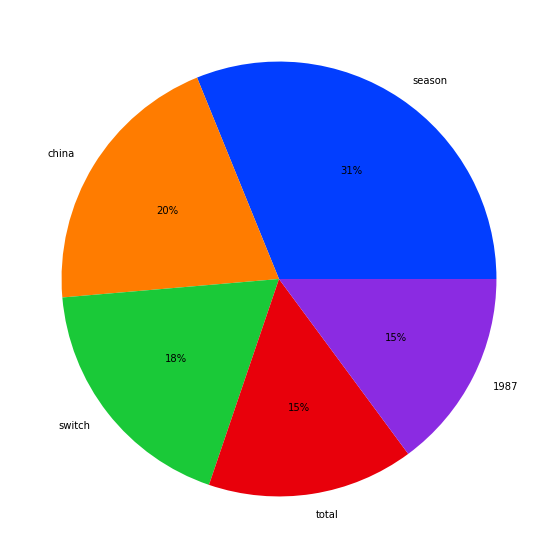

In [12]:
#Plotting a pie chart to visualize the percentage of top 5 words(amongst top 5 words)
plt.figure(figsize=(10,10))
palette_color = sns.color_palette('bright')
plt.pie(top_five_Df[0],labels=top_five_Df.index, colors=palette_color, autopct='%.0f%%')
plt.show()

### Splitting Data

In [13]:
#using train test split to split the training data
X_train, X_test = train_test_split(final_df, test_size=0.20, random_state=42)

In [14]:
#checking the shape of the test and train data
print(f"Training Data shape:\t{X_train.shape}\n Testing Data Shape:\t{X_test.shape}")

Training Data shape:	(509, 4861)
 Testing Data Shape:	(128, 4861)


### K-Means
  1. Defining a function that runs the K-Means algorithm max_k times and returns a dictionary of each k result

In [15]:
def KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k)

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

##### K value
  1. We are going to run the algorithm for different k values.
  2. K(n_clusters) values vary from 2 to 10

In [16]:
k = 10
kmeans_results = KMeans(k, X_train)

In [17]:
#printing the results for different values of K
print(f" The Result:\n{kmeans_results}")

 The Result:
{2: KMeans(n_clusters=2), 3: KMeans(n_clusters=3), 4: KMeans(n_clusters=4), 5: KMeans(n_clusters=5), 6: KMeans(n_clusters=6), 7: KMeans(n_clusters=7), 8: KMeans(), 9: KMeans(n_clusters=9), 10: KMeans(n_clusters=10)}


In [18]:
#checking the score and distance for different cluster sizes

Result={}
df=[]
for key,value in kmeans_results.items():
  score=value.score(X_test)
  distance=value.inertia_
  Result[key]=[score,distance]
  df.append([key,distance])
distance_df=pd.DataFrame(df,columns=["Number of Clusters","Distance"])
print(f"Cluster Size:[Score, Distance]\n{Result}")
distance_df

Cluster Size:[Score, Distance]
{2: [-118.49496692619982, 468.4267709544773], 3: [-117.0542595965184, 461.4251934109025], 4: [-116.29070672287537, 455.5723557204028], 5: [-115.00853868559383, 451.34318957880765], 6: [-114.31674790028238, 446.80585802685147], 7: [-114.30047474303456, 443.6870447680085], 8: [-112.60679919020808, 438.94513509527917], 9: [-112.79517114855366, 434.73484713170814], 10: [-113.36689929699824, 432.7837800557811]}


,Number of Clusters,Distance
0,2,468.426771
1,3,461.425193
2,4,455.572356
3,5,451.343190
4,6,446.805858
5,7,443.687045
6,8,438.945135
7,9,434.734847
8,10,432.783780


<Figure size 864x720 with 0 Axes>

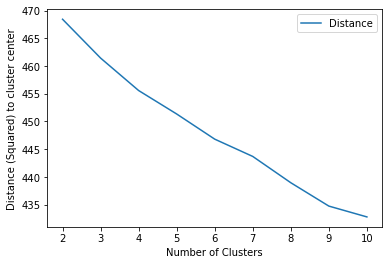

In [19]:
#Plotting squared distance against number of clusters
plt.figure(figsize=(12,10))
distance_df.set_index("Number of Clusters").plot()
plt.ylabel("Distance (Squared) to cluster center")
plt.show()

#### Observation:
  1. When the cluster size increases, the error is getting reduce.
  2. The K value 10, seperates the data well. But if we have less data and splitting into more clusters lead to poor performance.
  3. There is no particular elbow that can be observed here in the graph. According to these values, 9 seems to be a good number of clusters.
  4. We tried to increase the number of clusters which resulted in extended training times which is not desired.